# EDA

Read in data

In [30]:
import pandas as pd
import numpy as np

In [7]:
ecommerce_data = pd.read_pickle("data/ecommerce_data.pkl")

In [8]:
ecommerce_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDateTime,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,2011-12-09 12:50:00,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011-12-09 12:50:00,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011-12-09 12:50:00,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011-12-09 12:50:00,16.60


In [10]:
# distribution of the TotalPrice
ecommerce_data['TotalPrice'].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

In [12]:
# number of unique InvoiceNo 
ecommerce_data['InvoiceNo'].nunique()
print("Number of unique InvoiceNo:", ecommerce_data['InvoiceNo'].nunique())

Number of unique InvoiceNo: 25900


In [13]:
# number of unique stock codes
ecommerce_data['StockCode'].nunique()
print("Number of unique StockCode:", ecommerce_data['StockCode'].nunique())

Number of unique StockCode: 4070


In [9]:
# how many unique customers are there?
user_count = ecommerce_data['CustomerID'].nunique()
print(f"Number of unique users: {user_count}")

Number of unique users: 4372


In [17]:
# top 10 most popular product with names
# Note: Assuming 'StockCode' is the product identifier and 'Description' is the product name
top_10_products = ecommerce_data.groupby('Description')['StockCode'].count().nlargest(10)
print("Top 10 most popular products:")
print(top_10_products)

Top 10 most popular products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: StockCode, dtype: int64


In [26]:
# how many times users puchased?
# Note: Assuming 'CustomerID' is the user identifier and 'InvoiceNo' is the purchase identifier
user_purchases = ecommerce_data.groupby(['CustomerID']).agg(
    purchase_count=('InvoiceNo', 'nunique'),  # count unique purchases
    total_spent=('TotalPrice', 'sum')  # sum of total price
).reset_index()
# order the purchases in descending order
user_purchases = user_purchases.sort_values(by='purchase_count', ascending=False)

In [27]:
user_purchases

,CustomerID,purchase_count,total_spent
1895,14911.0,248,132572.62
330,12748.0,224,29072.10
4042,17841.0,169,40340.78
1674,14606.0,128,11713.85
568,13089.0,118,57385.88
...,...,...,...
1141,13877.0,1,117.24
2997,16400.0,1,303.93
1142,13878.0,1,1281.53
1149,13886.0,1,243.56


<AxesSubplot: >

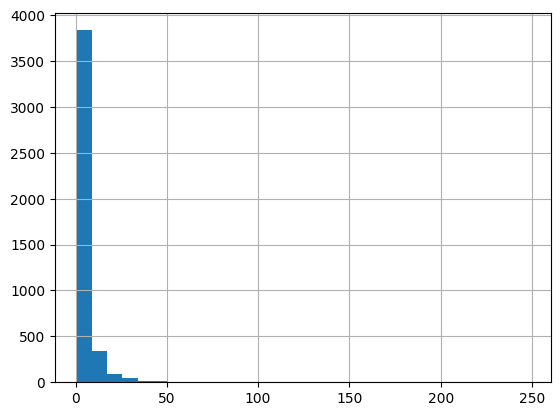

In [29]:
# distribution of the number of items purchased
user_purchases['purchase_count'].hist(bins=30)

<AxesSubplot: >

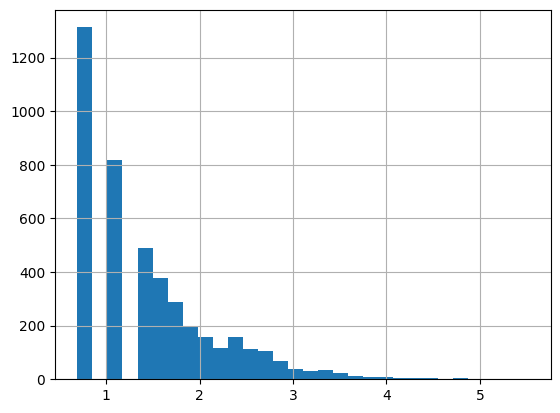

In [36]:
np.log1p(user_purchases['purchase_count']).hist(bins=30)